# TASK 1 : Import Libraries

Reference: This notebook was created as part of the guided project at https://www.coursera.org/

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 62.26 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os
main_dir = "./datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, "train")
#set the path to the test dir
test_dir = os.path.join(main_dir, "test")

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, "COVID19")

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, "NORMAL")
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, "COVID19")
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, "NORMAL")

In [4]:
#print the filenames--create a list of pictures
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:5])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:5])

#print the filenames--create a list of pictures
test_covid_names = os.listdir(test_covid_dir)
print(train_covid_names[:5])

test_normal_names = os.listdir(test_normal_dir)
print(train_normal_names[:5])

['COVID-19 (241).jpg', 'COVID19(309).jpg', 'COVID19(470).jpg', 'COVID-19 (187).jpg', 'COVID-19 (168).jpg']
['NORMAL(272).jpg', 'NORMAL(788).jpg', 'NORMAL(622).jpg', 'NORMAL(1138).jpg', 'NORMAL(1568).jpg']
['COVID-19 (241).jpg', 'COVID19(309).jpg', 'COVID19(470).jpg', 'COVID-19 (187).jpg', 'COVID-19 (168).jpg']
['NORMAL(272).jpg', 'NORMAL(788).jpg', 'NORMAL(622).jpg', 'NORMAL(1138).jpg', 'NORMAL(1568).jpg']


In [5]:
#print the total no of images present in each dir
print ("Total images present in the training set:", len(train_covid_names + train_normal_names))
print ("Total images present in the testing set:", len(test_covid_names + test_normal_names))

Total images present in the training set: 1811
Total images present in the testing set: 484


# TASK 3 : Data Visualization

['./datasets/Data/train/COVID19/COVID-19 (241).jpg', './datasets/Data/train/COVID19/COVID19(309).jpg', './datasets/Data/train/COVID19/COVID19(470).jpg', './datasets/Data/train/COVID19/COVID-19 (187).jpg']
['./datasets/Data/train/NORMAL/NORMAL(272).jpg', './datasets/Data/train/NORMAL/NORMAL(788).jpg', './datasets/Data/train/NORMAL/NORMAL(622).jpg', './datasets/Data/train/NORMAL/NORMAL(1138).jpg']


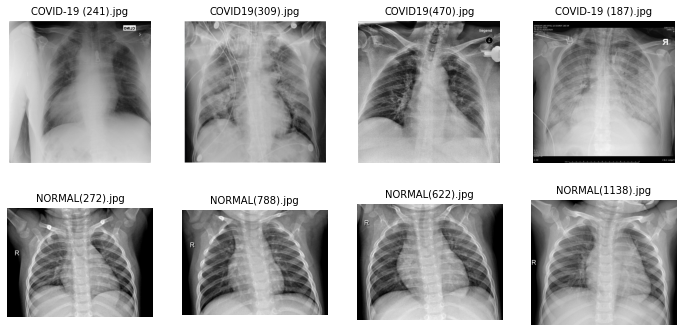

In [7]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mping

#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()#get current figure
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[:4]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:4]]
#print the list
print (covid_pic)
print (normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i, image_path in enumerate (merged_list):
  data = image_path.split('/',6)[5]
  sp = plt.subplot(rows, cols,i+1)
  sp.axis('Off')
  img = mping.imread(image_path)# read the image
  sp.set_title (data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')
plt.show()


# TASK 4 : Data Preprocessing & Augmentation

In [8]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255, validation_split = 0.4,zoom_range = 0.2, 
                                vertical_flip = True)#data augmentation
dgen_validation = ImageDataGenerator(rescale = 1./255)      
dgen_test = ImageDataGenerator(rescale = 1./255)  

train_generator = dgen_train.flow_from_directory(train_dir,target_size = (150,150), subset = 'training',
                                                 batch_size = 32, class_mode = 'binary') #if more than two classes use class_mode = 'categorical'

validation_generator = dgen_train.flow_from_directory(train_dir,target_size = (150,150), subset = 'validation',
                                                 batch_size = 32, class_mode = 'binary')  

test_generator = dgen_test.flow_from_directory(test_dir,target_size = (150,150),
                                                 batch_size = 32, class_mode = 'binary')                                              

Found 1087 images belonging to 2 classes.
Found 724 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [9]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [10]:
!pip install keras_visualizer 
from keras_visualizer import visualizer 

In [11]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation= 'relu', input_shape=(150,150,3)))#number of filters 32 (or 32 features), (5,5) is size of each filter
# pooling layer
model.add(MaxPool2D(pool_size = (2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation= 'relu'))
# pooling layer
model.add(MaxPool2D(pool_size = (2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))#256 nodes
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))#sigmoid since this is binary classifiction
model.summary()#37*37*64 = 87616

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [12]:
visualizer(model, filename='graph', format='png')

# TASK 6 : Compile & Train the Model

In [12]:
#compile the model
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy']) #lr = learning rate

In [13]:
#train the model
history = model.fit(train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
34/34 [==============================] - 77s 2s/step - loss: 1.6659 - accuracy: 0.6880 - val_loss: 0.3973 - val_accuracy: 0.8646
Epoch 2/10
34/34 [==============================] - 64s 2s/step - loss: 0.3638 - accuracy: 0.8398 - val_loss: 0.3840 - val_accuracy: 0.8895
Epoch 3/10
34/34 [==============================] - 63s 2s/step - loss: 0.2842 - accuracy: 0.8878 - val_loss: 0.2822 - val_accuracy: 0.9144
Epoch 4/10
34/34 [==============================] - 56s 2s/step - loss: 0.2630 - accuracy: 0.8955 - val_loss: 0.2704 - val_accuracy: 0.9240
Epoch 5/10
34/34 [==============================] - 56s 2s/step - loss: 0.2372 - accuracy: 0.9040 - val_loss: 0.2207 - val_accuracy: 0.9337
Epoch 6/10
34/34 [==============================] - 57s 2s/step - loss: 0.2342 - accuracy: 0.9116 - val_loss: 0.1634 - val_accuracy: 0.9586
Epoch 7/10
34/34 [==============================] - 58s 2s/step - loss: 0.1921 - accuracy: 0.9273 - val_loss: 0.1708 - val_accuracy: 0.9323
Epoch 8/10
34/34 [==

# TASK 7 : Performance Evaluation

In [14]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

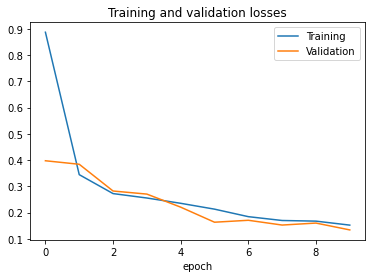

In [15]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

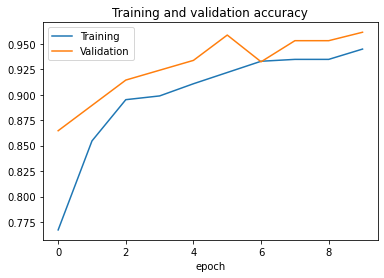

In [16]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [17]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss: {} test acc: {}'.format(test_loss, test_acc))

16/16 [==============================] - 13s 782ms/step - loss: 0.2248 - accuracy: 0.8781
test_loss: 0.2248026579618454 test acc: 0.8780992031097412


## Comparison

Our results in this Notebook show an accuracy of 0.9298, with a loss of 0.1579.

The orignal Notebook had the same task with an accuracy of 0.9132 and a loss of 0.1923.

It seems overall, the changes have **improved** the results of the model as expected. By increasing the number of epoch, we consumed more computer resources but we doubled the number of full training cycles on the training set and evaluated results (after each cycle) twice as many times (epoch=5 vs epoch=10).

Out of curiosity (and to see if I could eliminate the false negative) I re-did with epoch=20 and the additional cycles did not help.


# TASK 8 : Prediction On New Data

In [21]:
#try to predict the covid status based on ew x-ray images (e.g., assume the model in a real clinical setting)
from keras.preprocessing import image

files = ['./COVID-19 (313).jpg','./COVID-19 (587).jpg','./NORMAL(136).jpg','./NORMAL(1001).jpg']

for filename in files:    
    img = image.load_img(filename, target_size = (150, 150))
    images = image.img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    prediction = model.predict(images)
    print (filename)
    if prediction ==0:
        print('covid detected')
    else:
        print ('Your report is normal')

./COVID-19 (313).jpg
Your report is normal
./COVID-19 (587).jpg
Your report is normal
./NORMAL(136).jpg
Your report is normal
./NORMAL(1001).jpg
Your report is normal


Results are mixed. 
- The two normal images came out NORMAL.
- The two COVID x-ray came out with COVID DETECTED.
- The second COVID x-ray come out NORMAL.

The model could be improve a few ways. Increasing the size of the training set is one obvious method. Changing some of the parameters, like trying to increase epoch further could also improve results.

Ultimately, the work done on most modules, demonstrates non of these models are perfect and they always carry an error rate. Developing models which more holistically consider the whole patient could really help. In this case, the model was only considering X-Ray images. One could develop a model which not only accounts for Xrays but other criteria, some numerical like age, temperature, bloor pressure and others categorical: exposure and symptoms for example. Combining Xray or CT-scan with these clinical datapoints could tremendously increase the test accuracy.

Other implementation decisions can be made to improve results:
- Always having a Doctor perform the final review and comfirming results from the models.
- Combining the output of multiple models.
Are both typical examples.

I re-ran a model with epoch=20 and re-ran a image check. I don't expect the results to be better.




# OPTIONAL

I was not able to complete optional models. I re-ran with epoch=20 but the test with the VGG16 model ran out of memory.

Indeed, with epoch=20 I got 2 negatives and 2 false negatives:

```
NORMAL(1001).jpg
Your report is normal
NORMAL(136).jpg
Your report is normal
COVID-19 (313).jpg
Your report is normal
COVID-19 (587).jpg
Your report is normal
```

As an additional test. I'm using below a model inspired by https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/. This is a VGG16, a Convolutional Network for Classification and Detection.


In [ ]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(150,150,3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the headModel on top of the base model 
model2 = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers 
for layer in baseModel.layers:
	layer.trainable = False

# compile 
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
history2 = model2.fit_generator(
	trainAug.flow(train_generator, validation_generator, batch_size=BS),
	steps_per_epoch=len() // BS,
	validation_data=(validation_generator),
	validation_steps=len(validation_generator) // BS,
	epochs=EPOCHS)



58892288/58889256 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...


In [ ]:
#plot graph between training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss, test_acc = model2.evaluate(test_generator)
print('test_loss: {} test acc: {}'.format(test_loss, test_acc))

In [ ]:
#try to predict the covid status based on ew x-ray images (e.g., assume the model in a real clinical setting)
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload ()
for filename in uploaded.keys():    
    img_path = '/content/'+filename
    img = image.load_img(img_path, target_size = (150, 150))
    images = image.img_to_array(img)
    images = np.expand_dims(images, axis = 0)
    prediction = model2.predict(images)
    print (filename)
    if prediction ==0:
        print('covid detected')
    else:
        print ('Your report is normal')